# TP 3 - Linear regression with python

# Learning Outcomes
After completing this labo, you will know:

1. How to implement a linear regression using the gradient descent algorithm from scratch.
2. How to use high level implementations (np.polyfit() ou Scikit-learn).
3. How to evaluate the quality of a regression using the $R^2$ score.

## Implement a linear regression model. Steps by steps:
- [] import numpy module
- [] create a matrix X following the exemple in the slides
- [] create a vector y following the exemple in the slides (y = ax + b)
- [] create a vector theta containing the parameters of the model (a and b)
- [] initiaize theta to random values between 0 and 1
- [] initialize the learning rate, alpha, to 0.0001
- [] create a function that computes the gradient of the cost function
- [] create a function that computes the gradient descent
- [] create a function that computes the prediction
- [] create a function that computes the accuracy of the model
- [] create a function that plots the model
- [] create a function that plots the cost function
- [] create a function that plots the gradient descent
- [] create a function that plots the prediction
- [] create a function that plots the accuracy of the model

### Advanced
- [] Implement a linear regression using Scikit learn
- [] Study the coefficient of determination: $R^2$ (denoted $R^2$ or $r^2$ and pronounced "R squared")
- [] Implemente and compute $R^2$ (pour differents $\alpha$ and max iterations)
- [] Implement a smarter stop criterium


## Import

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

### Define the different constants (max iterations, learning rate)

In [2]:
DEBUG = False 
iterations = 1000000  # (you may want to change this value)
alpha = 0.00001 # initialize the learning rate (you may want to change this value)

## Create dummy data

Using numpy, create a column array following the exemple in the slides. In our case **x** is a column vector (*n x 1*) containing the following values:  42, 50, 55, 62, 62, 75, 85, 120

In [3]:
x = np.array([[42, 50, 55, 62, 62, 75, 85, 120]]).T

Create a column vector **y** with the following values: 500’000, 530’000, 560’000, 660’000, 630’000, 700’000, 800’000, 1’002’000


In [4]:
y = np.array([[5, 5.3, 5.6, 6.6, 6.3, 7, 8, 10.02]]).T

### Plot the dataset (x, y)

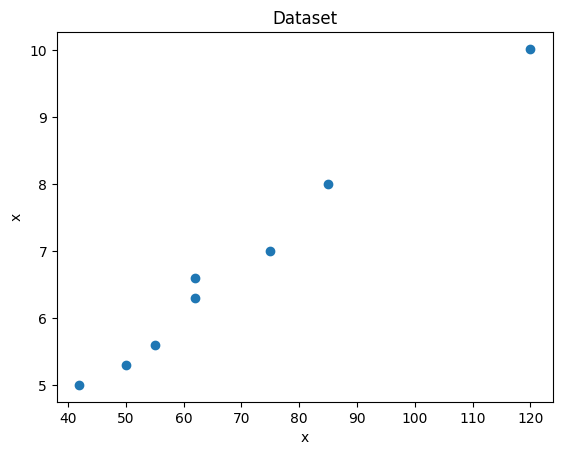

In [5]:
def plot_dataset(x, y):
    '''Plot the dataset'''
    plt.plot(x, y, 'o')
    plt.title("Dataset")
    plt.xlabel('x')
    plt.ylabel('x')
    plt.show()

plot_dataset(x, y)

### Create $\theta$ 

Create a vector theta $\theta$ containing the parameters of the model. $\theta_0$ and $\theta_1$ are the coefficients of the linear regression model and are initialized to random small values (or zeros).

In [6]:
theta_0 = 0 # rd.uniform(0, 1)
theta_1 = 0 # rd.uniform(0, 1)

theta = np.array([[theta_1, theta_0]]).T

In [7]:
print(theta.shape)

(2, 1)


### Loss function
Create the function that computes the loss/cost (for plotting purpose only)

In [8]:
def compute_loss(x, y, theta):
    '''Compute the loss for a given theta'''
    n = len(x)
    X = np.concatenate([np.ones_like(y), x], axis=1)     
    cost = 1 / (2 * n) * np.sum((np.dot(X, theta) - y)**2)
    return cost


### Loss function gradient
Create the functions that computes the gradient of the cost function.
This function will be called in the gradient descent function and make the updates:

$\theta_{0} \leftarrow \theta_{0} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})$


$\theta_{1} \leftarrow \theta_{1} - \alpha \frac{1}{N} \sum_{n=1}^{N}(h_{\theta}(\mathbf{x}_{n}) - y_{n})x_{n,1}$

In [9]:
def cost_gradient(x, y, theta):
    '''Calculate the gradient of the cost function
    Parameters: theta, x, y
    Returns: gradient'''
    n = len(x)
    gradient = np.zeros(theta.shape)   
    X = np.concatenate([np.ones_like(y), x], axis=1) 
    
    # Calculate the gradient
    # gradient = np.dot(X.T, np.dot(X, theta.T) - y) / n
    gradient[0, 0] = (1 / n) * np.sum(np.dot(X, theta) - y) 
    gradient[1, 0] = (1 / n) * float(np.dot((np.dot(X, theta) - y).T, x))

    return gradient # Return the gradient, gradient is a 2x1 matrix

### Gradient descent
Create a function that computes the gradient descent (you can use ```np.dot``` et ```np.sum```)

In [10]:
def gradient_descent(x, y, theta, alpha, iterations, history=False):
    ''' Gradient Descent function to minimize the cost function
    Parameters: x, y, theta, alpha, iterations
    Returns: 
    - theta: the optimum theta
    - loss_history: the evolution of the loss during the training 
    - theta_history: the evolution of theta during the training'''
    
    gradient_history = []
    if history:
        loss_history = []
        loss_history.append(compute_loss(x, y, theta))  # initial loss
    
    for _ in range(iterations):
        gradient = cost_gradient(x, y, theta)
        theta = theta - alpha * gradient
        if history:
            gradient_history.append(gradient)
            loss_history.append(compute_loss(x, y, theta))  # loss after update             
        if DEBUG:
            print(f"gradient = {gradient}")
            print()            
            print(f"theta = {theta}")
            print()
    return theta, loss_history

## Additional functions
Create a function that computes the prediction

In [11]:
def predict(x, theta):
    '''Predict the output of the model'''
    X = np.concatenate([np.ones_like(x), x], axis=1)
    prediction = np.dot(X, theta)
    return prediction # prediction is a matrix of the same shape as x

Create a function that computes the accuracy of the model

In [12]:
def accuracy(x, y, theta):
    '''Compute the accuracy of the model'''
    return np.mean(np.abs(predict(theta, x) - y) / y)

Create a function that plots the model

In [13]:
def plot_model(x, y, theta):
    '''Plot the model'''    
    plt.plot(x, y, '.')   
    plt.plot(x, predict(x, theta), '-')

    plt.show()

Create a function that plots the gradient history

In [14]:
def plot_loss_history(loss_history, log=True):
    '''Plot the gradient history using log scal for x and y'''
    plt.plot(loss_history)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()

## Compute the linear regression
Using x and y, compute the linear regression et plot everything

In [15]:
theta_opt, loss_history = gradient_descent(x, y, theta, alpha, iterations, history=True)

In [16]:
print(f"Best Theta: \n{theta_opt}")

Best Theta: 
[[1.37866159]
 [0.07650474]]


In [17]:
print("Final loss: ", compute_loss(x, y, theta_opt))

Final loss:  0.047162286819086956


[[1.37866159]
 [0.07650474]]


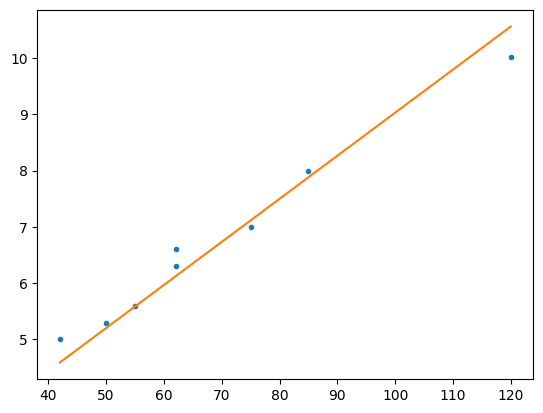

In [18]:
# plot_model(x, y, theta_opt)
print(theta_opt)
plot_model(x, y, theta_opt)

### Plot the loss evolution over time

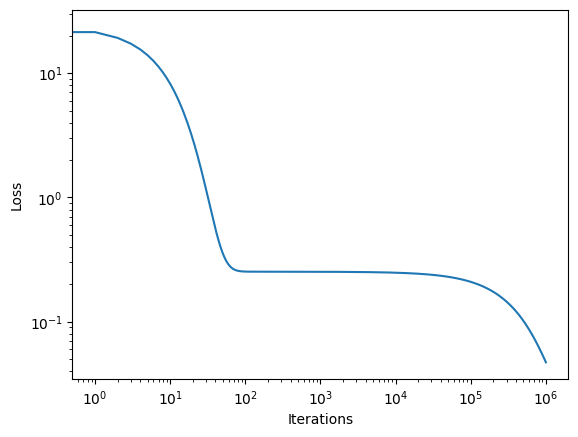

In [19]:
plot_loss_history(loss_history)

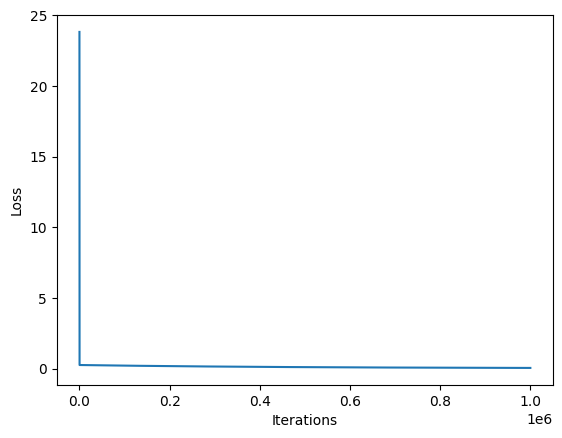

In [20]:
plot_loss_history(loss_history, log=False)

## Compute $R^2$

In [21]:
def compute_r2(x, y, theta):
    y_hat = predict(x, theta)
    ss_res = np.sum((y - y_hat)**2)
    y_mean = y.mean()
    ss_tot = np.sum((y - y_mean)**2)
    r2 = 1 - ss_res/ss_tot
    return r2

In [22]:
compute_r2(x, y, theta_opt)

0.9603393930467278

### Test using polyfit

Use ```np.polyfit()``` to compute the regression and compare the results (visually and numerically)

In [23]:
x_1 = [42, 50, 55, 62, 62, 75, 85, 120]
y_1 = [5, 5.3, 5.6, 6.6, 6.3, 7, 8, 10.02]

z = np.polyfit(x_1, y_1, 1)
p = np.poly1d(z)

In [24]:
p

poly1d([0.06625106, 2.16445828])

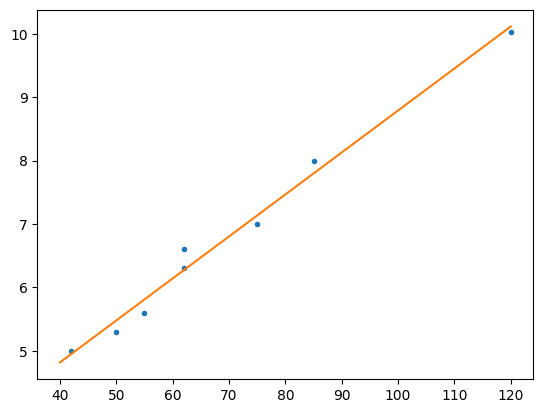

In [25]:
# plot using linspace (2000 => 2016)
xp = np.linspace(40, 120, 40)
raw = plt.plot(x_1, y_1, '.', label='raw data') 
liner = plt.plot(xp, p(xp), '-', label='linear')
plt.show()

In [26]:
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    print("coeffs:", coeffs)
    # fit values, and mean
    y_hat = p(x)                      # or [p(z) for z in x]
    y_mean = np.sum(y)/len(y)          # or sum(y)/len(y)
    
    ss_res = np.sum((y - y_hat)**2)
    ss_reg = np.sum((y_hat-y_mean)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    ss_tot = np.sum((y - y_mean)**2)    # or sum([ (yi - ybar)**2 for yi in y])    
    results['determination'] = 1 - ss_res / ss_tot

    return results

In [27]:
print(polyfit(x_1, y_1, 1))

coeffs: [0.06625106 2.16445828]
{'polynomial': [0.06625105947683764, 2.164458278532805], 'determination': 0.9866354857927693}


## Test using Scikit-learn
Same but with Scikit-learn

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)

In [29]:
reg.score(x, y)  # Return the coefficient of determination of the prediction.

0.9866354857927692

In [30]:
reg.coef_

array([[0.06625106]])

In [31]:
reg.intercept_

array([2.16445828])

## Go further
Scikit-learn provides multiple regression models (linear and no). Feel free to explore other models!